<h1><b>Assignment : CNN Classification on CIFAR-10 using PyTorch</b></h1>

Now that you have understood the working of a Convolutional Neural Network with all of its layers, it is now time to implement your knowledge in code. In this assignment, you will build a CNN classifier using PyTorch. 

In the L1 course, you built a classifier model using the **PyTorch**.What is even more interesting is that, we will be visualizing the intermediate steps and shapes of a CNN in even more detail. 

In this assignment, we will be using the **'CIFAR10'** dataset from PyTorch datasets. The dataset consists of 60,000 sample images with two default splits: train and test. It contains images from 10 different classes of objects with labels 0-9.
Below, you can see the different classes in the cifar10 dataset. It consists of 10 output classes:

1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

<h2><b>Importing Necessary Libraries</b></h2>

We will first start my importing the necessary libraries for our assignment. Specific libraries will be imported as we move further.

In [1]:
# imports
import os
import pickle
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F

print(torch.__version__)

1.13.1+cpu


<h2><b>Loading the dataset</b></h2>

As mentioned before, we will be using the **cifar10 dataset** from torchvision datasets for our classification task. Here, we have loaded the dataset. By default, it is split intro train and test sets. We will now use this default split to separate the dataset into the training and testing data.

In [2]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),  # To convert to tensor with compatible data type i.e., float32
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # To normalize image

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)


100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Here, you can see that the dataset contains image samples and labels. Each image is of size `32x32x3`. 

In [3]:
print(trainset.data.shape)
print(testset.data.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


We can even plot image samples and their labels from one of the sets. Here, we have imported matplotlib pyplot for the plotting operation.

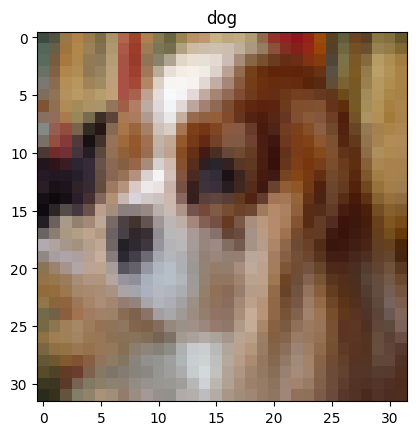

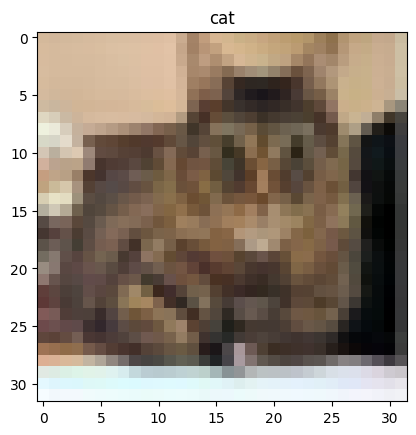

In [4]:
from operator import le
import matplotlib.pyplot as plt

# Show the first two images and labels from the training set
get_label_name = {v: k for k, v in trainset.class_to_idx.items()}
np.random.seed(49)
for idx in np.random.randint(0, len(trainset), size=2):
    image, label = trainset.data[idx], trainset.targets[idx]
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name[label])

<h2><b>Exercise 1: Layer Implementations for CNN architecture</b></h2>

<b>[POINTS: 6]</b>

Now for the exciting part, let us dive into the model building section. But before that, here we will experiment with custom layer building from PyTorch. You will be building three custom layers: <b>Conv2D, Max-pool and Dense layers </b> using nn.Module. The task might look a bit lengthy, but if you follow the instructions step-by-step, you will end up with your very own custom layers. For your ease, we have initialized a Glorot Uniform(Xavier Uniform in PyTorch) initializer with a seed value for parameter initialization.


<h3><b>Task 1:</b></h3>
<b>[POINTS: 2]</b>

(2 lines of code)

Fill in the `forward` function for the custom Conv2D layer class with the following steps:
1.   Pass the input through the `F.conv2d`. Use the weights, the bias the padding and the strides initialized in the `__init__` function above.
2. Finally, pass the input through a `F.relu` operation.


<h3><b>Task 2:</b></h3>
<b>[POINTS: 2]</b>

(1 line of code)

Fill in the `forward` function for the custom MaxPool layer class with the following steps:
1.   Pass the input through the `F.max_pool2d`. Use the attributes initialized in the `__init__` function to pass to this function.


<h3><b>Task 3:</b></h3>
<b>[POINTS: 2]</b>

(1 line of code)

Fill in the `forward` function for the custom Dense layer class with the following steps:
1.   Use the `torch.mm` to multiply the weights with the input and add the result to the bias. Use the weights and bias initialized in the `__init__` function.


In [5]:
### Ex-1-Task-1
class Conv2D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding='same'):
        """
        This function initializes the parameters for a conv2D layer

        Parameters
        ------------
        in_channels : int
        Number of channels in the input image

        out_channels : int
        Number of channels produced by the convolution

        kernel_size : int or tuple
        Size of the convolving kernel 

        stride : int or tuple
        Stride of the convolution. Default: 1

        padding: int, tuple or str
        Padding added to all four sides of the input. Default: 'same'
        """
        super(Conv2D, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = (kernel_size, kernel_size) if isinstance(kernel_size, int) else kernel_size
        self.stride = stride
        self.padding = padding

        self.weight = nn.Parameter(
            torch.nn.init.xavier_uniform_(
                torch.empty(
                    (self.out_channels, self.in_channels, *self.kernel_size),
                    requires_grad=True
                )
            )
        )
        self.bias = nn.Parameter(
            torch.zeros((self.out_channels,), requires_grad=True)
        )

    def forward(self, x):
        """
        This function performs convolution operation on the input
        Parameters
        ------------
        x : tensor, float32
        Input image to the convolution layer

        Returns
        ------------
        x : tensor, float32
        feature map output from the last layer
        """
        # Exercise 1 | Task 1
        ### BEGIN SOLUTION
        # your code here
        x = F.conv2d(x, weight = self.weight, bias = self.bias, padding = self.padding, stride = self.stride)
        x = F.relu(x)
        ### END SOLUTION
        return x

In [6]:
# INTENTIONALLY LEFT BLANK

In [7]:
### Ex-1-Task-2
class MaxPool(nn.Module):
    def __init__(self, kernel_size, stride=None, padding=0):
        """
        This function initializes the parameters for a maxpool layer

        Parameters
        ------------
        kernel_size : int
        window height and width for the maxpooling window

        stride : int
        the stride of the window. Default value is kernel_size

        padding: int
        implicit zero padding to be added on both sides
        """
        super(MaxPool, self).__init__()
        self.kernel_size = kernel_size
        self.stride = kernel_size if stride is None else stride
        self.padding = padding


    def forward(self, x): 
        """
        This function performs max-pool operation on the input

        Parameters
        ------------
        x : tensor, float32
        Input image to the convolution layer

        Returns
        ------------
        x : tensor, float32
        max-pooled output from the last layer
        """
        # Exercise 1 | Task 2 
        ### BEGIN SOLUTION
        # your code here
        x = F.max_pool2d(x, kernel_size = self.kernel_size, stride = self.stride, padding = self.padding)
        ### END SOLUTION
        return x

In [8]:
# INTENTIONALLY LEFT BLANK

In [9]:
### Ex-1-Task-3
class Dense(nn.Module):
    def __init__(self, in_features, out_features):
        """
        This function initializes the parameters for a dense layer
        Parameters
        ------------- 
        in_features : int
        shape of the input to the dense layer

        out_features : int
        number of units in the dense layer
        """
        super(Dense, self).__init__()
        self.in_features = in_features
        self.out_features =  out_features
        
        self.weight = nn.Parameter(
            torch.nn.init.xavier_uniform_(
                torch.empty(
                    (self.in_features, self.out_features),
                    requires_grad=True,
                )
            )
        )
        self.bias = nn.Parameter(
            torch.zeros((self.out_features,), requires_grad=True)
        )

    def forward(self, x):
        """
        This function performs dense operation on the input
        Parameters
        ------------
        x : tensor, float32
        Input flattened image to the convolution layer

        Returns
        ------------
        x : tensor, float32
        linear operation output from the last layer
        """
        # Exercise 1 | Task 3
        ### BEGIN SOLUTION
        # your code here
        x = torch.mm(x, self.weight) + self.bias
        return x
        ### END SOLUTION

In [10]:
# INTENTIONALLY LEFT BLANK

<h2><b>Exercise 2: Creating the CNN architecture</b></h2>

<b>[POINTS: 4]</b>

Now that you've made your custom layers ready, here you will be combining these layers to create a complete CNN model. We have created a Model called `CNNModel` for the purpose. The `__init__` function initializes all the necessary layers required for the model. The `forward` function passes the input through the layers initialized above.

<h3><b>Task 1:</b></h3>
<b>[POINTS: 2]</b>

(3 lines of code)

Initialize the `c4, m2 and d1` layers for the model using the custom layers you created above.
1.   Use the filter_dim and the remaining elements from the channels and variables list, as the parameters for the `c4` convolution layer.
2. Use k = 2 as a parameter for the `m2` maxpooling layer
3. Finally, use the remaining elements from the dense_in_features and dense_out_features lists as parameters for the `d1` dense layer.


<h3><b>Task 2:</b></h3>
<b>[POINTS: 2]</b> 

(6 lines of code)

Pass the input the following series of layers:
1. c4
2. m2
3. dropout
4. Reshape layer to flatten the input before passing through the dense layer 
5. d1
6. Relu layer



In [11]:
### Ex-2-Task-1
class CNNModel(nn.Module):
    def __init__(self):
        """
        This function initializes the layers for the CNN model
        """
        super(CNNModel, self).__init__()

        # parameters for conv layers
        filter_dim = 3
        in_channels = [3, 16, 32, 32]
        out_channels = [16, 32, 32, 64]

        # parameters for dense layers
        dense_in_features = [4096, 256]
        dense_out_features = [256, 10]

        # initializing all the layers
        self.c1 = Conv2D(in_channels[0], out_channels[0], filter_dim)
        self.c2 = Conv2D(in_channels[1], out_channels[1], filter_dim)
        self.m1 = MaxPool(2)
        self.dropout = nn.Dropout(p=0.25)
        self.c3 = Conv2D(in_channels[2], out_channels[2], filter_dim)

        self.c4 = None
        self.m2 = None
        self.d1 = None

        # Exercise 2 | Task 1
        ### BEGIN SOLUTION
        # your code here
        self.c4 = Conv2D(in_channels[3], out_channels[3], filter_dim)
        self.m2 = MaxPool(2)
        self.d1 = Dense(dense_in_features[0], dense_out_features[0])
        ### END SOLUTION

        self.d2 = Dense(dense_in_features[1], dense_out_features[1])

In [12]:
### Ex-2-Task-2
def forward(self, x):
    """
    This function performs convolutions, relu, max_pooling, dropout, 
    reshape and dense operations on the input to the model.

    Parameters
    ------------
    x : tensor, float32
    Input image to the model

    Returns
    ------------
    x : tensor, float32
    output from the last layer

    """
    x = self.c1(x)
    x = self.c2(x)
    x = self.m1(x)
    x = self.dropout(x)

    x = self.c3(x)

    # Exercise 3 | Task 2
    ### BEGIN SOLUTION
    # your code here
    x = self.c4(x)
    x = self.m2(x)
    x = self.dropout(x)
    x = nn.Flatten()(x)
    x = self.d1(x)
    x = F.relu(x)
    ### END SOLUTION

    x = self.d2(x)

    return x

CNNModel.forward = forward
model = CNNModel()

In [13]:
# INTENTIONALLY LEFT BLANK

In [14]:
# INTENTIONALLY LEFT BLANK

In [15]:
example = torch.randn((1, 3, 32,32))
output = model(example)
model

CNNModel(
  (c1): Conv2D()
  (c2): Conv2D()
  (m1): MaxPool()
  (dropout): Dropout(p=0.25, inplace=False)
  (c3): Conv2D()
  (c4): Conv2D()
  (m2): MaxPool()
  (d1): Dense()
  (d2): Dense()
)

Once we pass the input through the model, we can now check the model summary to visualize all the layers, parameters in each layer and the total number of parameters.

<h2><b>Exercise 3: Implement Cost Function</b></h2>

<b>[POINTS: 1]</b>

Now, you need to compute the cost using a cost function, to check if your model is actually learning or not.
Here we will be creating a function to compute the cross-entropy cost $J$, given the actual and predicted labels. The formula for cross entropy loss is given below: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(A^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- A^{[L](i)}\right)) $$

As for this exercise, you will be directly using a built-in Tensorflow function for the cross entropy loss. 

<h3><b>Task:</b></h3>
<b>[POINTS: 1]</b>

(1 line of code)

Use the `F.cross_entropy` function to calculate the cross entropy loss between the target and predicted output.

In [16]:
### Ex-3-Task-1
def loss(target_y, predicted_y):
    """
    Cross entropy loss between target and predicted value
      
    Parameters
    ----------
    target_y: tensor, float32
    Target labels
    predicted_y: tensor, float32
    Prediction of the classes made by model
      
    Returns
    -------
    cost: tensor, float32
    The average cross-entropy cost of the mini-batch of inputs
      
    """
    cost = None
    # Exercise 3
    ### BEGIN SOLUTION
    # your code here
    cost = F.cross_entropy(predicted_y, target_y)
    ### END SOLUTION

    return cost

In [17]:
# INTENTIONALLY LEFT BLANK
### BEGIN HIDDEN TEST
y1 = torch.tensor([1, 0, 1, 0])
y2 = torch.tensor([[0.93, 0.07], [0.15, 0.85], [0.3, 0.7], [0.7, 0.3]])
assert loss(y1, y2).item() == 0.8355244398117065
### END HIDDEN TEST

<h2><b>Exercise 4: Calculation of Gradients and Optimization</b></h2>

<b>[POINTS: 2]</b> 

In this section, we move to the optimization process. We will be calculating the gradients and use them to update the trainable parameters of the model with the help of an optimizer. 
We will define a function `train()` which takes four parameters: model, inputs, outputs, and optimizer. It returns the current loss of the model and its predicted output labels.

<h3><b>Task:</b></h3>
<b>[POINTS: 2]</b> 

(2 lines of code)

Compute gradients with the help GradientTape (for automatic differentiation) and apply the gradients to update the weights of the model using the Adam optimizer set below. 

Perform backward propagation from the calculated loss and update model parameters using optimizer. Be sure to remove previously calculated gradients.

**Hint:**
Use backward() method and step() method from loss and optimizer respectively.

In [18]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = model.to(device)

LEARNING_RATE = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [19]:
### Ex-4-Task-1

def train(model: nn.Module, inputs, outputs, optimizer: torch.optim.Optimizer):
    """
    A function for training a model which performs both gradient computation 
    and weight update.
    
    Parameters
    ----------
    model: CNNModel
    The model for training, should be in train mode.

    inputs: tensor
    Tensor of features or independent data(samples)

    outputs: tensor
    Tensor of actual labels or dependent data
                   
    Returns:
    -------
    current_loss: tensor, float32
    loss of the current training step

    y_predicted: tensor, float32
    Prediciton by the model at the current training step
    """

    optimizer.zero_grad()
   
    y_predicted = model(inputs)
    y = outputs
    current_loss = loss(y, y_predicted)

    # Exercise 4 
    ### BEGIN SOLUTION
    # your code here
    current_loss.backward()
    optimizer.step()
    ### END SOLUTION
    
    return current_loss, y_predicted    

In [20]:
# INTENTIONALLY LEFT BLANK

<h2><b>Exercise 5: Training and Evaluation</b></h2>

<b>[POINTS: 4]</b>

For the final part, you will be training the model on the training dataset. You will be marked on the test accuracy that you receive. Now here, you will perform the training process with the hyperparameters like number of epochs, batch size and learning rate.The records of the training accuracy in each epoch as well as the test accuracy in each epoch are stored in variable named `train_acc_per_epoch` and `test_acc_per_epoch` respectively.

To get the feel of how your optimization is working, we have printed the value of total loss and accuracy at each epoch for both the training and test sets. You can tweak the number of epochs, batch size and learning rate to observe the changes in training as well. To start off, you can use the default values set by us.

**Criteria for the distribution of the marks is:**

Level 2 : Test accuracy more than 60 % -> Full marks

Level 1 : Test accuracy between 50%-60 % -> 50% marks

Accuracy less than 50 % : No marks

You have no tasks as such for this section. You can check out the training process and predictions below  by just executing the cells.

In [21]:
batch_size = 64
num_epochs = 3

In [22]:
# creating dataloader of samples from the dataset
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size)

In [23]:
### Ex-5-Task-1



train_acc_per_epoch = []
test_acc_per_epoch = []

print("Training")

for i in range(num_epochs):
    train_loss = []
    train_acc = []
    model.train()
    for num, (x_batch, y_batch) in enumerate(train_loader):
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        losses, pred = train(model, x_batch, y_batch, optimizer) 
        train_loss.append(losses.item())
        train_acc.append((y_batch == pred.argmax(dim=-1)).float().mean().item())
    
    test_loss = []
    test_acc = []
    model.eval()
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            test_pred = model(x_batch)
            test_loss.append(loss(y_batch, test_pred).item())
            test_acc.append((y_batch == test_pred.argmax(dim=-1)).float().mean().item())
    
    print('\nEpoch: {}\tTrain Loss: {}\tTrain Accuracy: {}\n\t\tTest Loss: \
    {}\tTest Accuracy: {}\n'.format(
         i+1, np.mean(train_loss), np.mean(train_acc), np.mean(test_loss), 
         np.mean(test_acc)
    ))

    # tracking accuracy in each epoch for plot
    train_acc_per_epoch.append(np.mean(train_acc))
    test_acc_per_epoch.append(np.mean(test_acc))

# To save the trained model for later use
export_file = 'cifar.pth'
torch.save(model, export_file)

with open("test_acc.txt", "wb") as fp:
    pickle.dump(test_acc, fp)

#### UPLOAD test_acc.txt ALONG WITH YOUR SUBMISSION

Training

Epoch: 1	Train Loss: 1.3666936801675031	Train Accuracy: 0.5112691815856778
		Test Loss:     1.0554761924561422	Test Accuracy: 0.62609474522293


Epoch: 2	Train Loss: 0.9480399314476096	Train Accuracy: 0.6651214833759591
		Test Loss:     0.8626531328365301	Test Accuracy: 0.6975517515923567


Epoch: 3	Train Loss: 0.7790823108552362	Train Accuracy: 0.7278812340153452
		Test Loss:     0.8126552773129408	Test Accuracy: 0.7152667197452229



Alright! You have completed all your tasks. Now, you can check your training and validation accuracy here. It's time for us to evaluate the model and give you marks on the basis of the accuracy your model achieves on the test set. For a visualization of your accuracy, you can checkout the plot below.

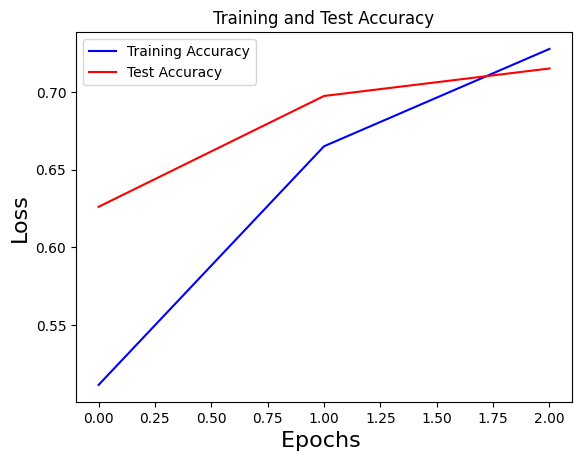

<Figure size 640x480 with 0 Axes>

In [24]:
### Ex-5-Task-2


plt.plot(range(0,num_epochs), train_acc_per_epoch, 'b', label='Training Accuracy')
plt.plot(range(0,num_epochs), test_acc_per_epoch, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

In [25]:
# INTENTIONALLY LEFT BLANK

In [26]:
# INTENTIONALLY LEFT BLANK

<h2><b>Predicting the labels for test_set</b></h2>

Now that you have checked the model performance on both the train and test set, in this section you'll be even more clear with what the model has predicted for your test data. We create a `predict` function that passes the inputs through the model and print the predicted labels. We then print the actual and predicted labels for two samples of the test_dataset.

In [27]:
def predict(inputs):
    """
    This function predicts the predicted outputs for the given test input sample

    Parameters
    ------------
    inputs : tensor, float32
    test input sample

    Returns:
    -------------
    predicted: tensor, float32
    Predicitons for each class by the model 
    """
    export_file = 'cifar.pth'
    cifar_model = torch.load(export_file).to(device)
    predicted = cifar_model(inputs.to(device))
    return predicted

In [28]:
for sample, label in test_loader:
    pred = predict(sample)
    first_five_pred = pred[0:5]
    print("Predicted labels for first five samples of the first batch:",torch.argmax(first_five_pred, dim=-1))
    print("Actual labels for first five samples of the first batch:", label[0:5])
    break

Predicted labels for first five samples of the first batch: tensor([3, 8, 8, 0, 6])
Actual labels for first five samples of the first batch: tensor([3, 8, 8, 0, 6])
